#### Import required libraries

In [72]:
from skimage.io import imread, imshow
import numpy as np
from scipy import stats

#### Open Image

In [111]:
image = imread(r'C:/Users/digag/Desktop/DigAg2022/Lab04/im1.png')

#### Get image size

In [112]:
#image = np.expand_dims(image, axis=-1)
#image = np.concatenate((image,image,image), axis=-1)
#print(image.shape)
image_size = image.shape
print(image_size)

(480, 640, 3)
(480, 640, 3)


#### Descriptive Statistics: Max, Min, Mean, Median, Mode - pixel values in each channel

In [89]:
max_pixel = np.max(np.max(image, axis=0), axis=0)
min_pixel = np.min(np.min(image, axis=0), axis=0)
mean_pixel = np.mean(np.mean(image, axis=0), axis=0)
median_pixel = np.median(np.median(image, axis=0), axis=0)
mode_pixel = stats.mode(stats.mode(image)[0].squeeze())[0].squeeze()

print(max_pixel)
print(min_pixel)
print(mean_pixel)
print(median_pixel)
print(mode_pixel)

[255 255 255]
[0 0 0]
[126.92200521 116.84723958  90.15244792]
[99. 58.  0.]
[0 0 0]


#### Visualize image pixel values

<IPython.core.display.Javascript object>


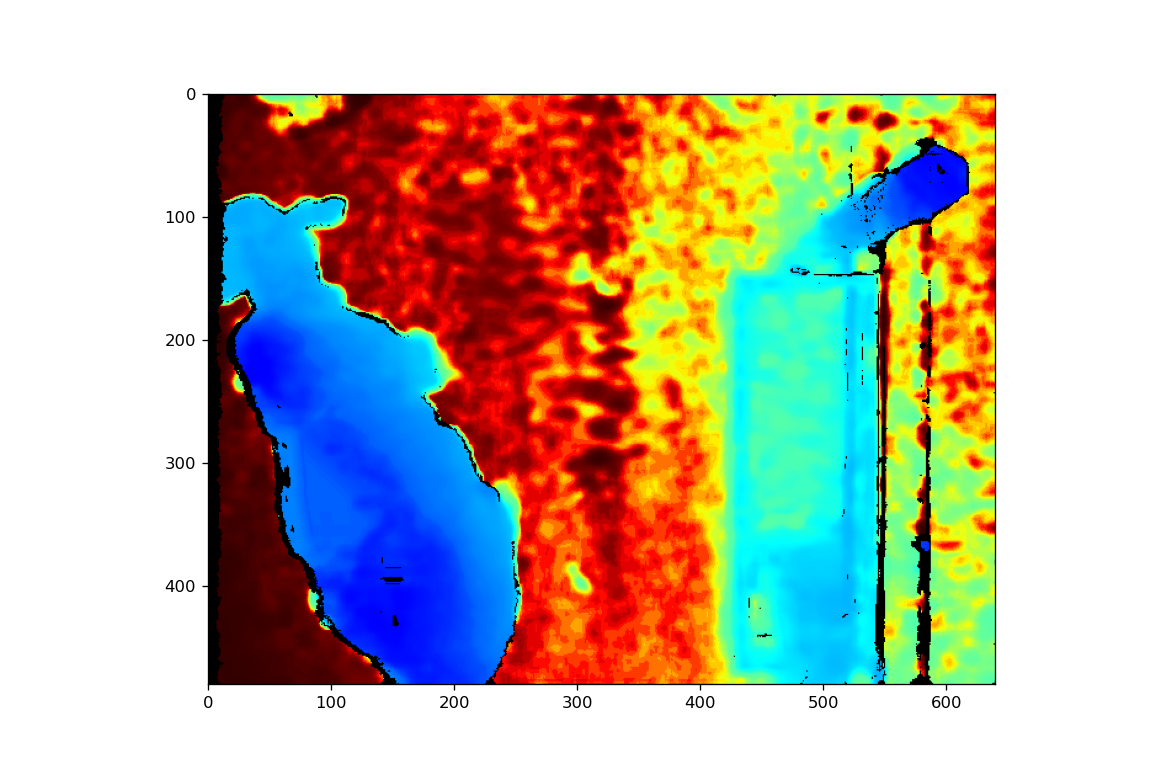

In [90]:
%matplotlib notebook
import matplotlib.pyplot as plt
im = plt.imshow(image)

#### Image histogram for each RGB channel

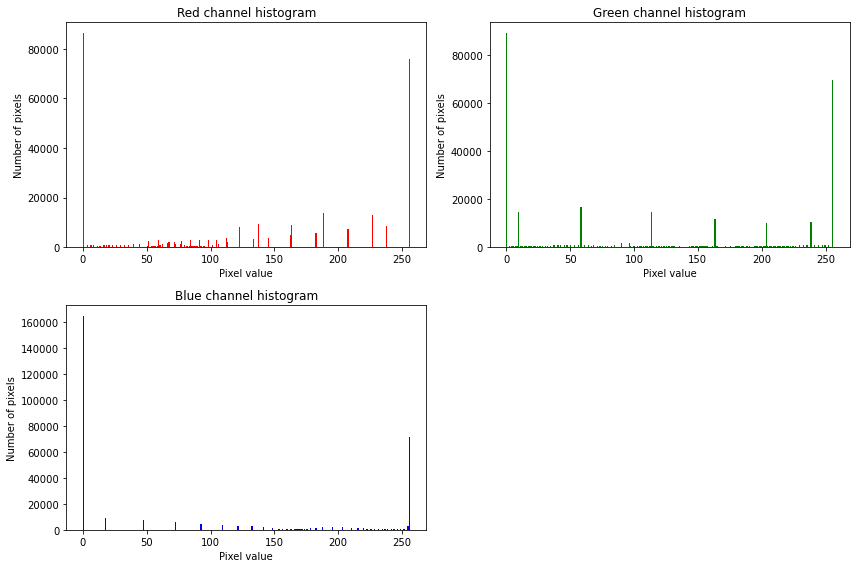

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
image_histogram_red = plt.hist(image[:,:,0].flatten(), bins=256, range=[0, 256], facecolor='red')
plt.title('Red channel histogram')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.subplot(2, 2, 2)
image_histogram_green = plt.hist(image[:,:,1].flatten(), bins=256, range=[0, 256], facecolor='green')
plt.title('Green channel histogram')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.subplot(2, 2, 3)
image_histogram_blue = plt.hist(image[:,:,2].flatten(), bins=256, range=[0, 256], facecolor='blue')
plt.title('Blue channel histogram')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.tight_layout()
plt.show()

#### Read each RGB channel

In [94]:
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

#### Define the upper and lower bounds of pixel values that corresponds to the corn, for each channel:

In [95]:
red_lower = 0
red_upper = 0
green_lower = 180
green_upper = 255
blue_lower = 254
blue_upper = 255
#gray_upper = 250
#gray_lower = 255

#### Segmentation Part 1

In [99]:
# Set to 0 all pixels that are outside the defined bounds for any channel
mask = (blue_channel >= blue_lower) & (blue_channel <= blue_upper)

#using all channels
#mask = (red_channel >= red_lower) & (red_channel <= red_upper) & \
#       (green_channel >= green_lower) & (green_channel <= green_upper) & \
#       (blue_channel >= blue_lower) & (blue_channel <= blue_upper)
#rc = red_channel.copy()
#rc[np.invert(mask)] = 0
#gc = green_channel.copy()
#gc[np.invert(mask)] = 0
bc = blue_channel.copy()
bc[np.invert(mask)] = 0

# Recombine separate color channels into a single, true color RGB image
#using all channels
#segmented_image = np.stack((rc, gc, bc), axis=-1)
segmented_image = np.stack((bc), axis=-1)

#### Segmentation Part 2 - Visualizing the original and segmented images

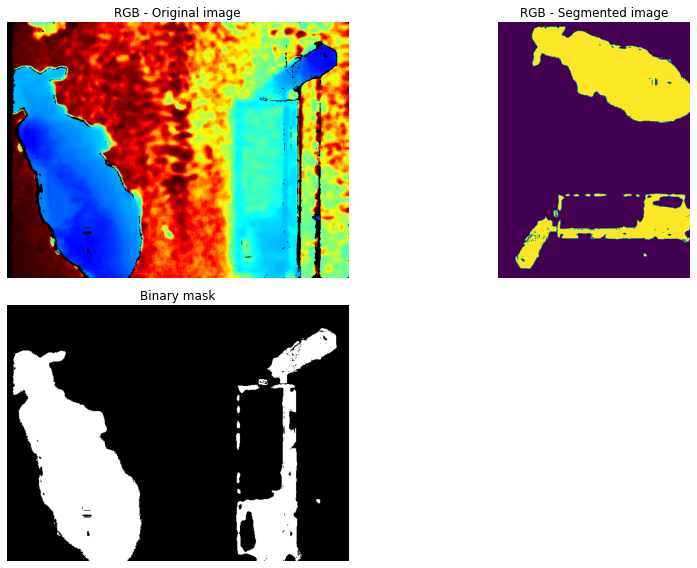

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('RGB - Original image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(segmented_image)
plt.title('RGB - Segmented image')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(mask, cmap='gray')
plt.title('Binary mask')
plt.axis('off')
plt.tight_layout()
plt.show()

# #### Feature extraction - USE THIS PART FOR QUESTION 3!!

## open your image:

In [8]:
from skimage.io import imread, imshow
import numpy as np
from scipy import stats

binaryImage = imread(r'C:/Users/digag/Desktop/DigAg2022/Lab04/g1bw.png')

<IPython.core.display.Javascript object>


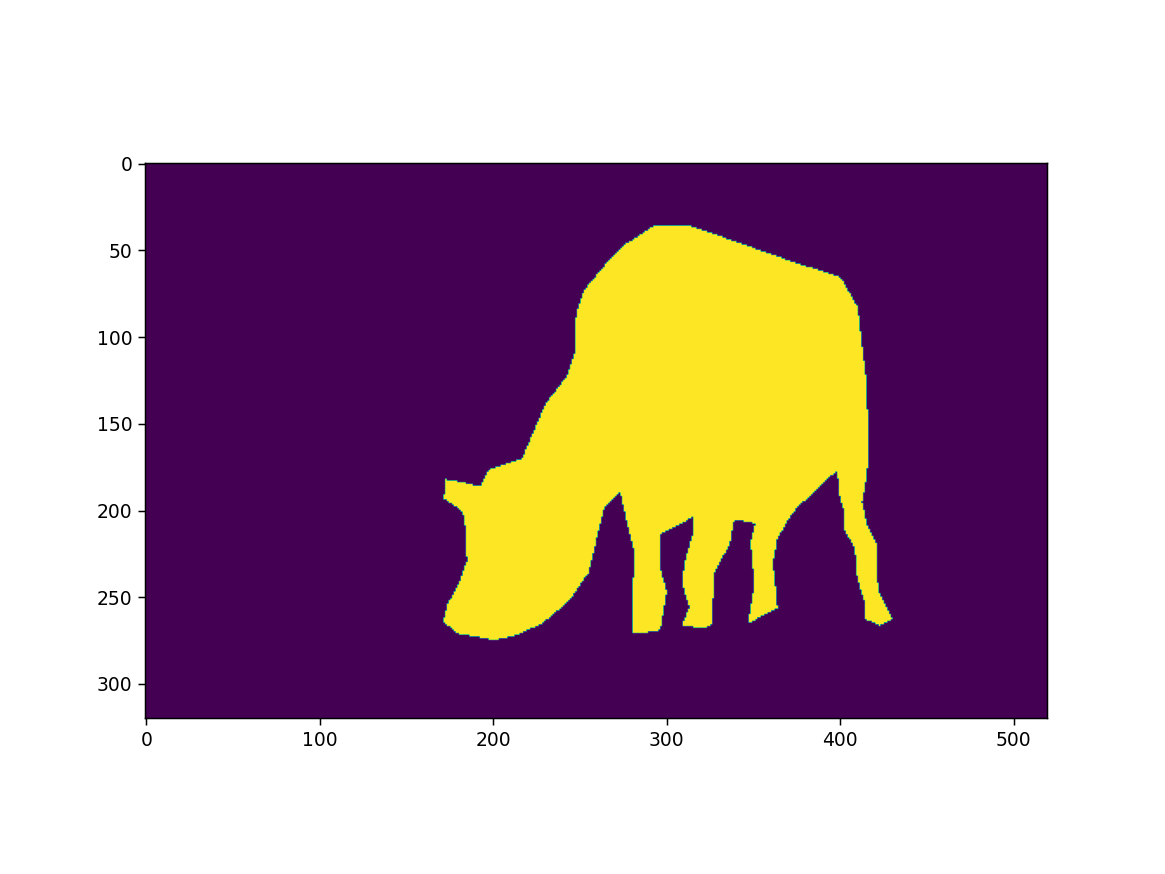

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
Segim = plt.imshow(binaryImage)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go

from skimage import data, filters, measure, morphology
from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

label_image = label(binaryImage)
props = regionprops_table(label_image, properties=('centroid',
                                                   'perimeter',
                                                       'area'))
pd.DataFrame(props)


,centroid-0,centroid-1,perimeter,area
0,156.092398,306.298715,1443.093542,36570


C:\Users\digag\AppData\Local\Temp/ipykernel_5844/2870323257.py:16: UserWarning:

Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?




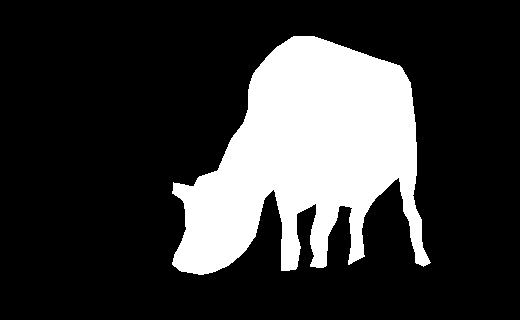

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go

from skimage import data, filters, measure, morphology
from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

label_image = label(binaryImage)

mask1 = morphology.remove_small_objects(binaryImage, 7)
mask1 = morphology.remove_small_holes(binaryImage, 7)
labels = measure.label(mask1)

fig = px.imshow(binaryImage, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info


props = measure.regionprops(labels, mask1)
properties = ['area', 'eccentricity', 'perimeter', 'area']

# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(go.Scatter(
        x=x, y=y, name=label_i,
        mode='lines', fill='toself', showlegend=False,
        hovertemplate=hoverinfo, hoveron='points+fills'))

plotly.io.show(fig)



[<skimage.measure._regionprops.RegionProperties object at 0x00000290B09525E0>, <skimage.measure._regionprops.RegionProperties object at 0x00000290B0BC8730>, <skimage.measure._regionprops.RegionProperties object at 0x00000290B0BC8790>, <skimage.measure._regionprops.RegionProperties object at 0x00000290B0BC8190>, <skimage.measure._regionprops.RegionProperties object at 0x00000290B0BC81C0>, <skimage.measure._regionprops.RegionProperties object at 0x00000290B1B9CF40>, <skimage.measure._regionprops.RegionProperties object at 0x00000290B1A66910>, <skimage.measure._regionprops.RegionProperties object at 0x00000290B1A66640>, <skimage.measure._regionprops.RegionProperties object at 0x00000290B1A66460>, <skimage.measure._regionprops.RegionProperties object at 0x00000290BB9B4A00>, <skimage.measure._regionprops.RegionProperties object at 0x00000290B06089A0>, <skimage.measure._regionprops.RegionProperties object at 0x00000290B0608130>, <skimage.measure._regionprops.RegionProperties object at 0x0000